# Homework 3

## Problem 1: Feature Detection

### Imports

In [1]:
# optional: allow Jupyter to "hot reload" the Python modules I wrote, to avoid restarting the kernel after every change
%load_ext autoreload
%autoreload 2

In [3]:
import glob

import seaborn as sns
import matplotlib.pyplot as plt

import util
from util.corner_detection import HarrisCornerDetector
from util.ops import SimilarityMeasure

DATA_PATH = "./AlignmentTwoViews/*"

### Part A: Harris Corner Detector

#### Image 1

In [3]:
img_paths = glob.glob(DATA_PATH)

In [4]:
img_paths

['./AlignmentTwoViews/uttower_right.jpg',
 './AlignmentTwoViews/uttower_left.jpg']

In [5]:
img1 = util.load_image(img_paths[0], return_array=True)

Dimensions of ./AlignmentTwoViews/uttower_right.jpg: 683 x 1024


In [6]:
corner_detector = HarrisCornerDetector()
response = corner_detector.detect_features(img1)

Let's just double check the properties of this `response` variable:

In [6]:
type(response)

numpy.ndarray

In [7]:
response.shape

(683, 1024)

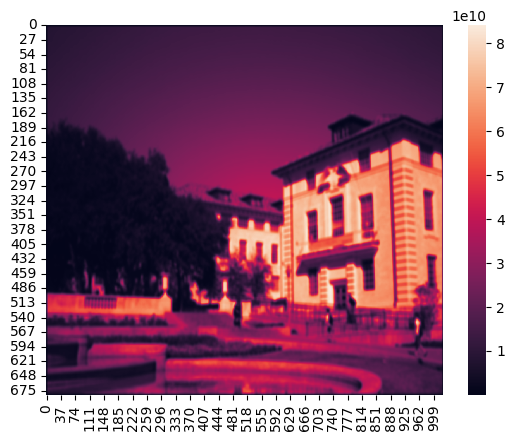

In [8]:
sns.heatmap(response)  # just playing around, this is not my solution image
plt.show()

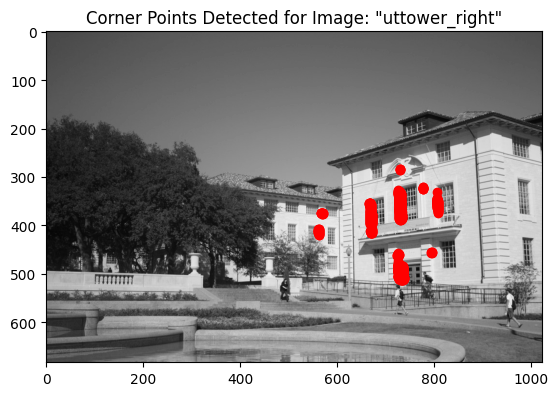

In [12]:
HarrisCornerDetector.execute_and_visualize(
    img1, "uttower_right",
    use_non_max_suppression=False,
)

#### Image 2

In [5]:
img2 = util.load_image(img_paths[1], return_array=True)

Dimensions of ./AlignmentTwoViews/uttower_left.jpg: 683 x 1024


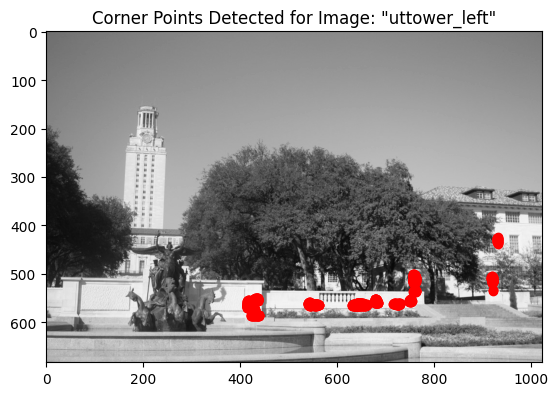

In [17]:
HarrisCornerDetector.execute_and_visualize(
    img2,
    "uttower_left",
    use_non_max_suppression=False,
)

### Part B: Leveraging Non-Maximum Suppression

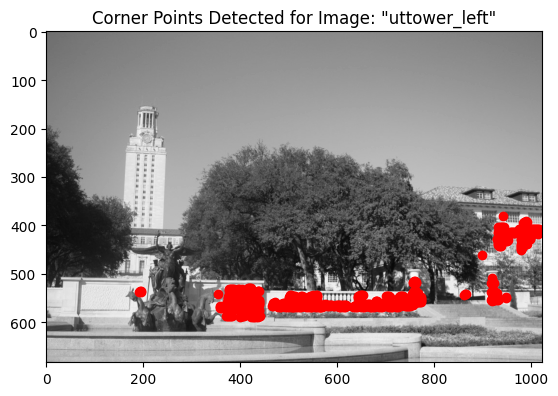

In [6]:
HarrisCornerDetector.execute_and_visualize(
    img2,
    "uttower_left",
    use_non_max_suppression=True,
)

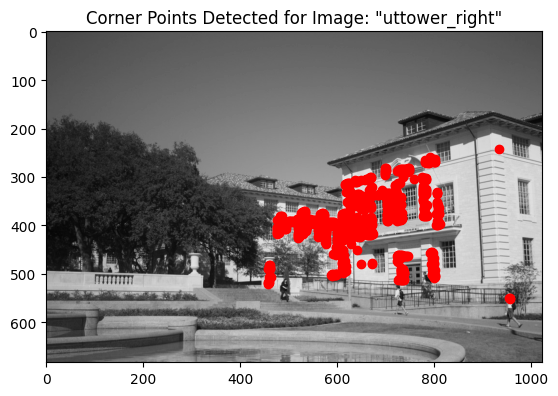

In [9]:
HarrisCornerDetector.execute_and_visualize(
    img1,
    "uttower_right",
    use_non_max_suppression=True,
)

### Part C: Patch Similarity Measures

For convenience, let's recompute the features for both images (in case the cells above haven't been run):

In [4]:
corner_detector = HarrisCornerDetector()

In [5]:
img_paths = glob.glob(DATA_PATH)
right_img = util.load_image(img_paths[0], return_array=True)
left_img = util.load_image(img_paths[1], return_array=True)

Dimensions of ./AlignmentTwoViews/uttower_right.jpg: 683 x 1024
Dimensions of ./AlignmentTwoViews/uttower_left.jpg: 683 x 1024


#### Similarity Measure: Cosine Similarity 

For this part, I'm choosing to go with the cosine similarity to measure the correspondence between different points in the two images.

Cosine similarity is a popular metric, and it is fast to compute (just like the SSD or NCC measures). But there are also other advantages that make it useful for this problem:
- it is scale-invariant
- and robust to outliers

Truthfully, for our use case these advantages may not entirely be required. But we'll use it nonetheless, as it's arguably a useful default.

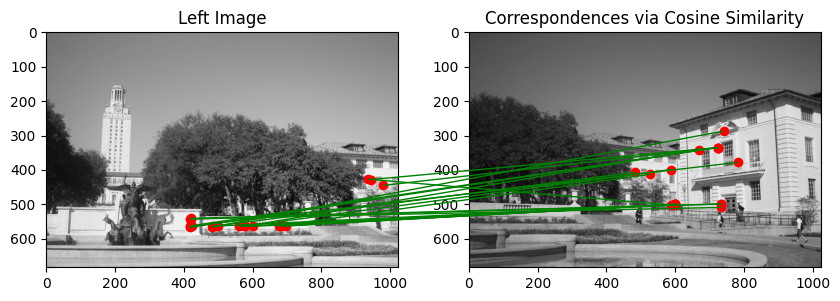

In [8]:
HarrisCornerDetector.visualize_correspondences(
    left_img,
    right_img,
    plot_title="Correspondences via Cosine Similarity",
    use_non_max_suppression=True,
    similarity_metric=SimilarityMeasure.COS,
)

#### Discussion: SSD vs. NCC?

As per the homework description, it's worth also exploring other similarity measures like the sum of squared differences (abbreviated SSD, aka the Euclidean distance) and normalized cross correlation (abbreviated NCC).

In general, there are some noteworthy differences between these two:
- SSD represents the straight-line distance between two points in a given vector space, while NCC measures the linear relationship between functions (as measured by the distribution of their output values, which can be stored in vectors).
- NCC is normalized, so it is better at being scale-variant (but that probably doesn't matter in our use case anyway). 
- SSD can be skewed more easily in the presence of outliers (but that shouldn't really matter here, as our measure is being computed with just two vectors).
- as we can see below, the correspondences found when using NCC tend to concentrate more along one area of the left image. This might not indicate a shortcoming with the metric itself though - it could be an issue with my implementation, which zero-pads the patches (when they go outside the image bounds). Although this sounds like an acceptable idea in theory, in practice it is possible that it "dilutes" the similarity measure, which throws off our feature matching. 
- so overall, the correspondences found by SSD were the best in this case - indicating that for simple matching problems like ours, it is perfectly acceptable. 

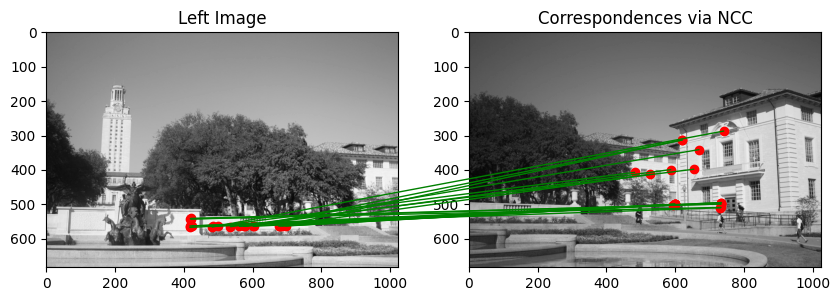

In [7]:
HarrisCornerDetector.visualize_correspondences(
    left_img,
    right_img,
    plot_title="Correspondences via NCC",
    use_non_max_suppression=True,
    similarity_metric=SimilarityMeasure.NCC,
)

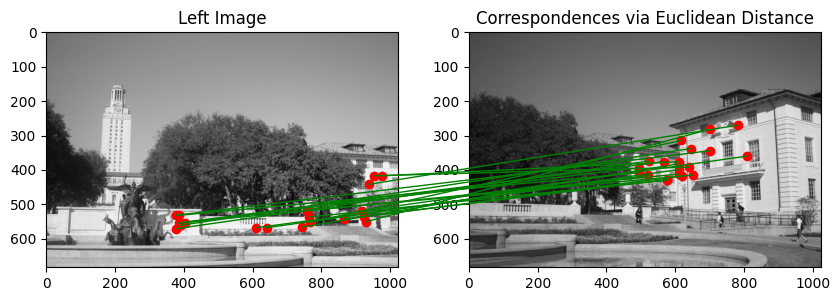

In [6]:
HarrisCornerDetector.visualize_correspondences(
    left_img,
    right_img,
    plot_title="Correspondences via Euclidean Distance",
    use_non_max_suppression=True,
    similarity_metric=SimilarityMeasure.SSD,
)

### Part D: Sensitivity to Rotation

In this next exploration, we should experiment with how SSD and NCC respond to rotations in the image.

#### Different Rotation Angles
I will be rotating the right image. We'll use several rotation angles, for completeness:

In [6]:
# load the left image like normal
img_paths = glob.glob(DATA_PATH)
left_img = util.load_image(img_paths[1], return_array=True)

Dimensions of ./AlignmentTwoViews/uttower_left.jpg: 683 x 1024


In [7]:
rotation_angles = [0, 15, 30, 45, 60, 75]

In [8]:
right_images = [
    util.load_image(
        img_paths[0],
        rotation_angle=angle_rotation,
        return_array=True
    )
    for angle_rotation in rotation_angles
]

Dimensions of ./AlignmentTwoViews/uttower_right.jpg: 925 x 1166
Dimensions of ./AlignmentTwoViews/uttower_right.jpg: 1105 x 1230
Dimensions of ./AlignmentTwoViews/uttower_right.jpg: 1209 x 1208
Dimensions of ./AlignmentTwoViews/uttower_right.jpg: 1229 x 1104
Dimensions of ./AlignmentTwoViews/uttower_right.jpg: 1167 x 926


#### How does NCC Respond to Rotation?

In [10]:
corner_detector = HarrisCornerDetector()

/Users/zainraza/Downloads/dev/courses/Stevens/CS-558/Corner-Detection-and-View-Alignment/util/ops.py:48: RuntimeWarning: invalid value encountered in scalar divide
  return numerator / denominator


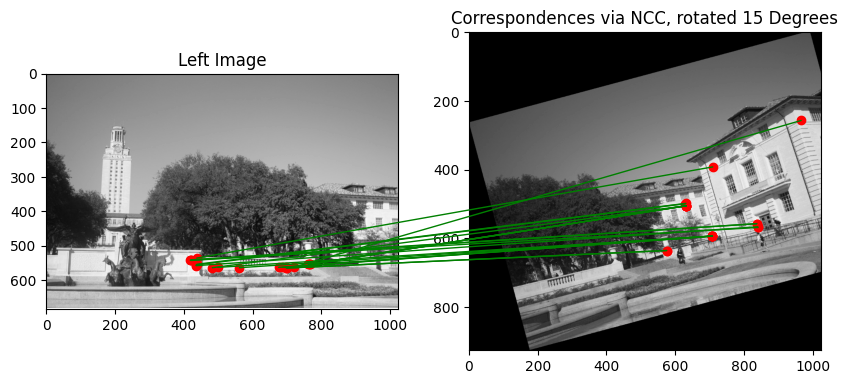

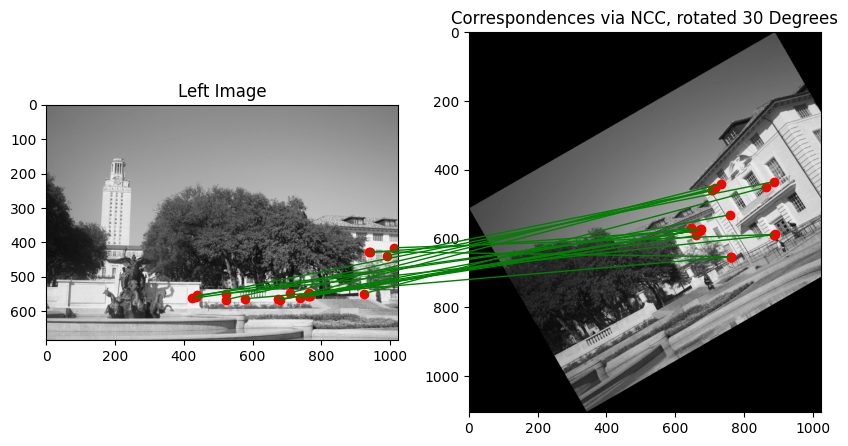

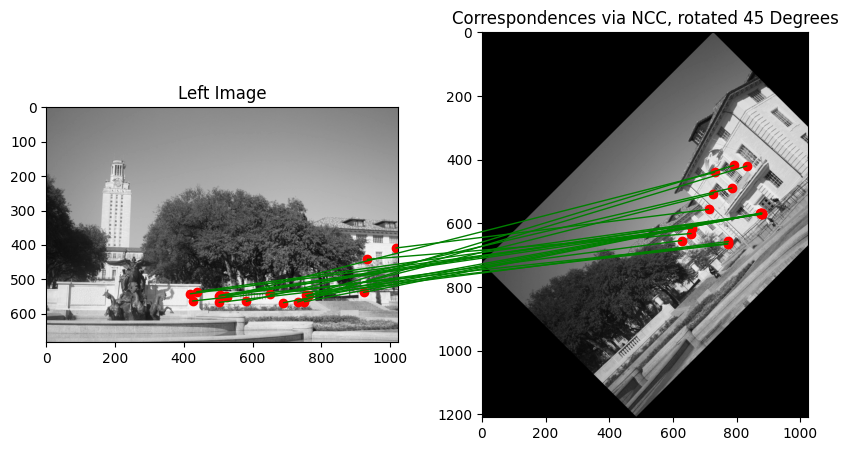

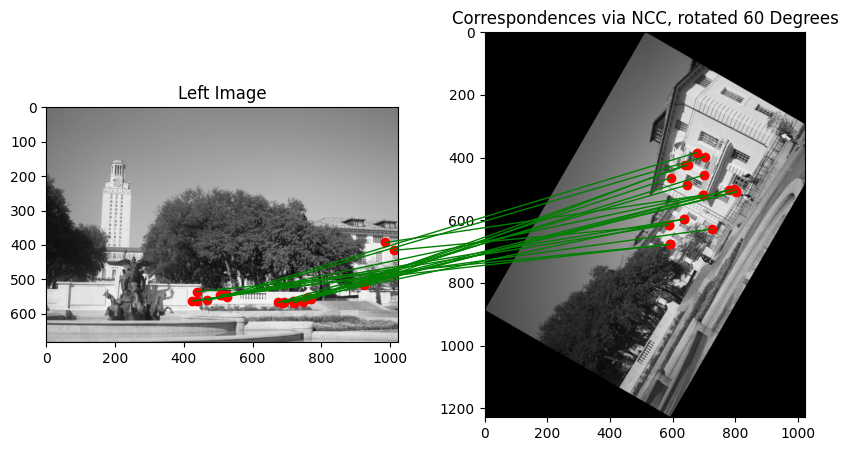

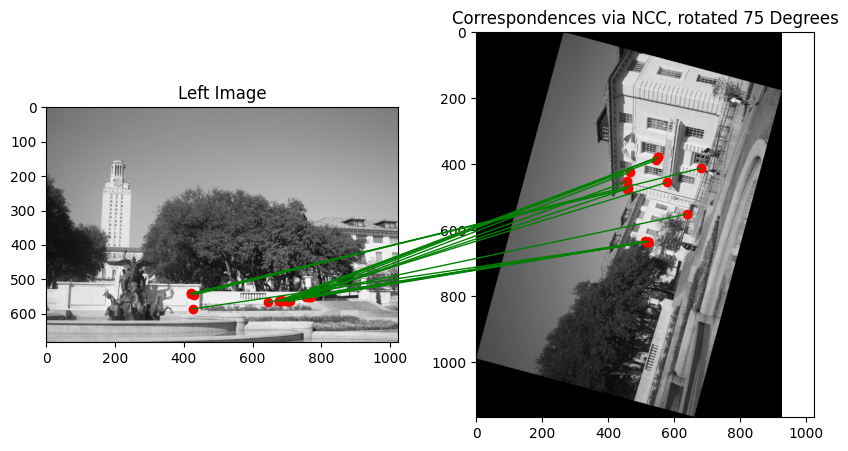

In [11]:
for index, rotation_degrees in enumerate(rotation_angles):
    HarrisCornerDetector.visualize_correspondences(
        left_img,
        right_images[index],
        plot_title=f"Correspondences via NCC, rotated {rotation_degrees} Degrees",
        use_non_max_suppression=True,
        similarity_metric=SimilarityMeasure.NCC,
    )

#### How does SSD Respond to Rotation?

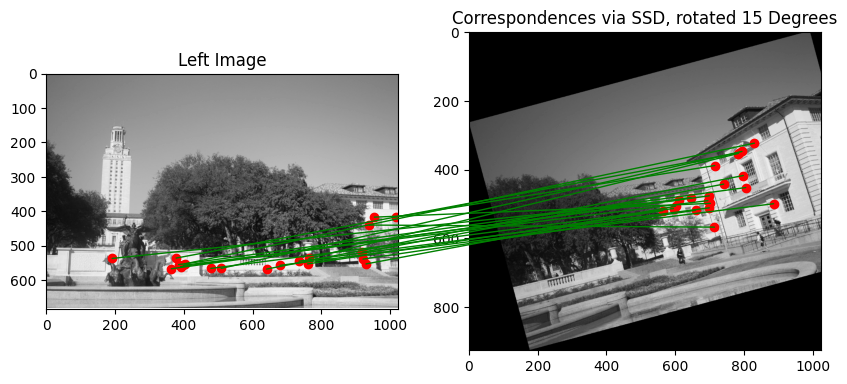

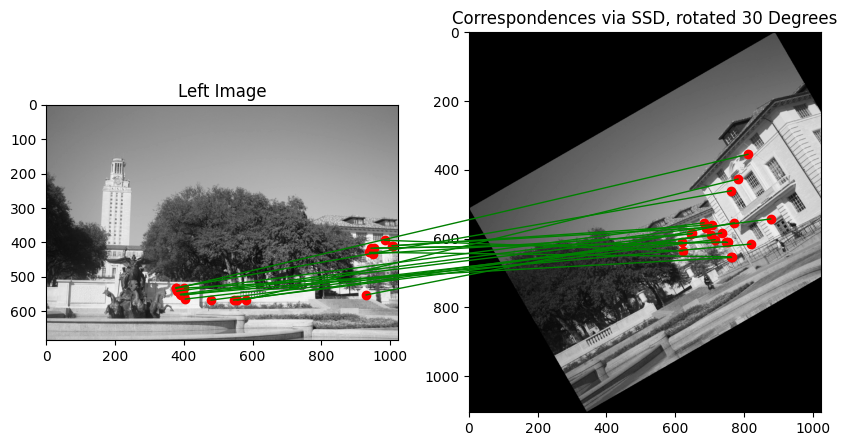

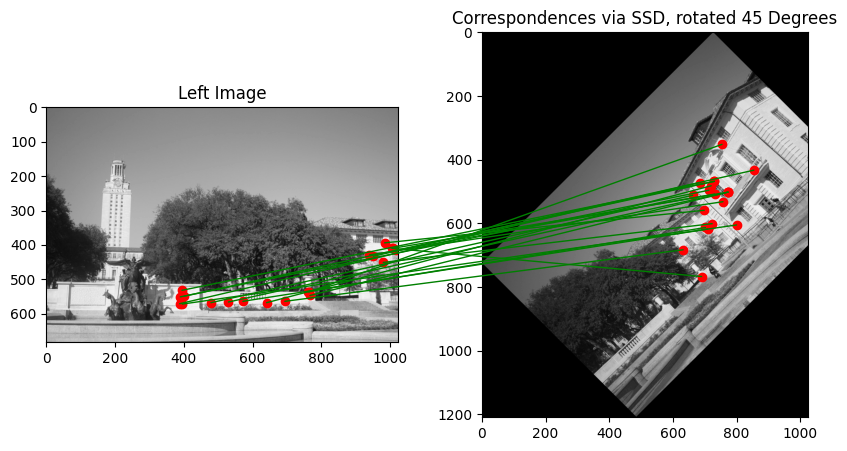

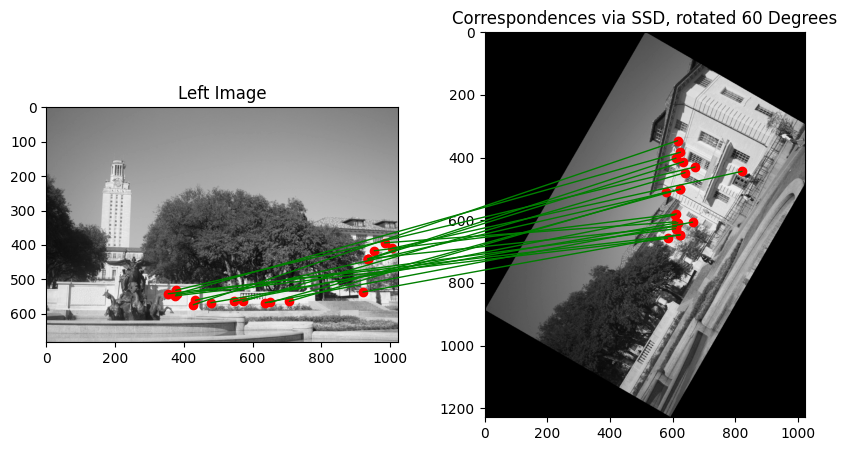

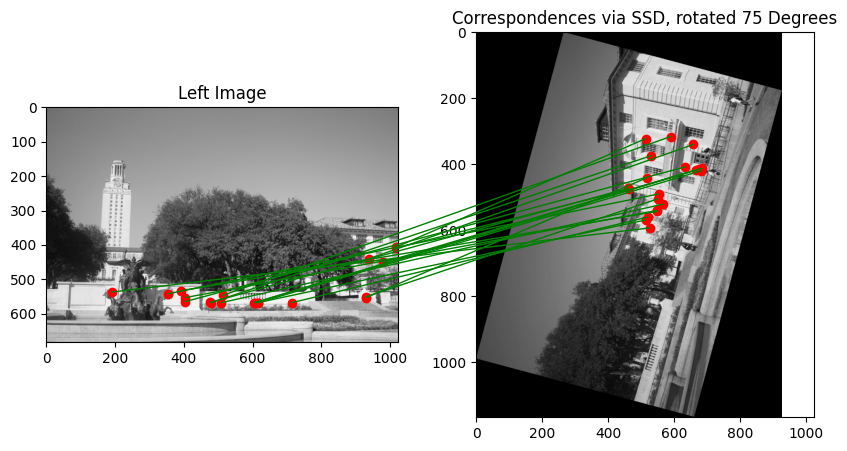

In [12]:
for index, rotation_degrees in enumerate(rotation_angles):
    HarrisCornerDetector.visualize_correspondences(
        left_img,
        right_images[index],
        plot_title=f"Correspondences via SSD, rotated {rotation_degrees} Degrees",
        use_non_max_suppression=True,
        similarity_metric=SimilarityMeasure.SSD,
    )

#### Discussion: Which Similarity Measure Responded Better?

This answer relies on a qualitative observation as to which set of correspondences on the rotated images did a better job of accurately matching corners: those using the SSD similarity measure, or NCC.

To make this call, I will rate the quality of each set of correspondences on a scale from 1-3:
- 1 = "poor" (e.g., if there are no correspondences between the "overlapping" part of the scene, i.e., the building that is shared between the two views)
- 2 = "ok", which is when there are some correspondences between the areas of both images that overlap
- 3 = "superb", which is when the majority of the correspondences computed are accurate

Based on this system, we can make a total of how well each similarity measure performed, with respect to each rotation angle used. Then to declare the better measure, we propose to use the sum of the ratings:

| Rotation (in degrees) |  SSD    | NCC |
|-----------------------|---------|-----|
|    15                 |   2     |  1
|    30                 |   2     |  2
|    45                 |   2     |  2
|    60                 |   2     |  2
|    75                 |   2     |  1
|   **Total**:          |  10     |  8

As we can see in the table, SSD scored a total of 10, while NCC only scored 8. This suggests SSD is slightly more robust to rotation than NCC.


#### Discussion: How to Be More Robust to Rotation?

The crux of the answer here is not to actually focus on the similarity measure itself, but on the feature descriptors that it is being used to compare. In my implementation so far, I've been using a straightforward kind of descriptor - it's just a normalized 1D vector of the patch containing the corner point itself. The shortcoming of this approach is that it's not necessarily rotation invariant. A better approach to improve the robustness to robust would be to use a more sophisticated kind of descriptor, such as SIFT or SURF. In this way, it is possible that the correspondences computed by the similarity measure would rotation invariant.

## Problem 2: Two View Image Alignment

In [93]:
# re-import as needed
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
import glob

import seaborn as sns
import matplotlib.pyplot as plt

import util
from util.corner_detection import HarrisCornerDetector
from util.ops import SimilarityMeasure
from util.model_fitting import RANSACAffineTransformFitter

DATA_PATH = "./AlignmentTwoViews/*"

In [8]:
img_paths = glob.glob(DATA_PATH)
left_img = util.load_image(img_paths[1], return_array=True)
right_img = util.load_image(img_paths[0], return_array=True)

Dimensions of ./AlignmentTwoViews/uttower_left.jpg: 683 x 1024
Dimensions of ./AlignmentTwoViews/uttower_right.jpg: 683 x 1024


### Part A: Building 2 Sets of Putative Features

To begin, we'll recompute two sets of feature correspondences - one based on highest similarity score (as determined by SSD), and the other will be a random selection.

In [9]:
# just a few configuration params
window_side_length = 3
use_non_max_suppression = True
top_many_features = 1000

#### The A1 Set: 20 Pairs Selected Based on Lowest SSD

In [4]:
detector = HarrisCornerDetector()
corner_response1 = detector.detect_features(left_img, use_non_max_suppression)
corner_response2 = detector.detect_features(right_img, use_non_max_suppression)
# pick top features
top_k_points1 = detector.pick_top_features(corner_response1, top_many_features)
top_k_points2 = detector.pick_top_features(corner_response2, top_many_features)
# compute feature descriptors, for top points
descriptors1 = HarrisCornerDetector.compute_feature_descriptors(
    left_img, top_k_points1, window_side_length
)
descriptors2 = HarrisCornerDetector.compute_feature_descriptors(
    right_img, top_k_points2, window_side_length
)

# Compute & plot the feature correspondences
a1_feature_correspondences = HarrisCornerDetector.compute_feature_correspondences(
    descriptors=[descriptors1, descriptors2],
    desired_num_similarities=20,
    similarity_metric=SimilarityMeasure.SSD,
)

#### The A2 Set: 30 Randomly Selected Pairs

In [5]:
detector = HarrisCornerDetector()
corner_response1 = detector.detect_features(left_img, use_non_max_suppression)
corner_response2 = detector.detect_features(right_img, use_non_max_suppression)
# pick top features
top_k_points1 = detector.pick_top_features(corner_response1, top_many_features)
top_k_points2 = detector.pick_top_features(corner_response2, top_many_features)
# compute feature descriptors, for top points
descriptors1 = HarrisCornerDetector.compute_feature_descriptors(
    left_img, top_k_points1, window_side_length
)
descriptors2 = HarrisCornerDetector.compute_feature_descriptors(
    right_img, top_k_points2, window_side_length
)

# Compute & plot the feature correspondences
a2_feature_correspondences = HarrisCornerDetector.compute_feature_correspondences(
    descriptors=[descriptors1, descriptors2],
    desired_num_similarities=30,
    similarity_metric=SimilarityMeasure.NULL,
)

### Part B: Estimating an Affine Transformation



#### B1: Using the A1 Set (Correspondences Chosen Based on Lowest SSD)

TODO - discuss what is the expected number of RANSAC iterations for this experiment?

In [96]:
fitter = RANSACAffineTransformFitter()

model_result, actual_num_iterations = fitter.fit(
    a1_feature_correspondences,
    distance_threshold=1000,
    do_logging=False,
)

======= Iteration 1 Report: ========
No. of Inliers: 14
Outlier Ratio: 0.30000000000000004
No. of Iterations (Expected): 10.962830879060355.
Avg reprojection error: 690.2583922209349.
======= Iteration 2 Report: ========
No. of Inliers: 0
No. of Iterations (Expected): 10.962830879060355.
Avg reprojection error: 2341.7059683514917.
======= Iteration 3 Report: ========
No. of Inliers: 0
No. of Iterations (Expected): 10.962830879060355.
Avg reprojection error: 6425.420838823593.
======= Iteration 4 Report: ========
No. of Inliers: 0
No. of Iterations (Expected): 10.962830879060355.
Avg reprojection error: 6425.42083882368.
======= Iteration 5 Report: ========
No. of Inliers: 0
No. of Iterations (Expected): 10.962830879060355.
Avg reprojection error: 2341.705968351473.
======= Iteration 6 Report: ========
No. of Inliers: 0
No. of Iterations (Expected): 10.962830879060355.
Avg reprojection error: 7253.335768289947.
======= Iteration 7 Report: ========
No. of Inliers: 0
No. of Iterations (Ex

#### B2: Using the A1 AND A2 Sets

TODO - discuss what is the expected number of RANSAC iterations for this experiment?

In [100]:
fitter = RANSACAffineTransformFitter()

model_result, actual_num_iterations = fitter.fit(
    a2_feature_correspondences,
    distance_threshold=1000,
    do_logging=False,
)

======= Iteration 1 Report: ========
No. of Inliers: 0
No. of Iterations (Expected): inf.
Avg reprojection error: 4885.538782972921.
======= Iteration 2 Report: ========
No. of Inliers: 1
Outlier Ratio: 0.9666666666666667
No. of Iterations (Expected): 124337.29242230256.
Avg reprojection error: 4147.927094167584.
======= Iteration 3 Report: ========
No. of Inliers: 0
No. of Iterations (Expected): 124337.29242230256.
Avg reprojection error: 10650.37414669649.
======= Iteration 4 Report: ========
No. of Inliers: 24
Outlier Ratio: 0.19999999999999996
No. of Iterations (Expected): 6.418893566513715.
Avg reprojection error: 727.0662486070779.
======= Iteration 5 Report: ========
No. of Inliers: 0
No. of Iterations (Expected): 6.418893566513715.
Avg reprojection error: 5156.54317627928.
======= Iteration 6 Report: ========
No. of Inliers: 0
No. of Iterations (Expected): 6.418893566513715.
Avg reprojection error: 113854.93629596988.
======= Iteration 7 Report: ========
No. of Inliers: 0
No. o